# Analysis 3
  * Comparetive analysis of how successful horror movies are in terms of earnings with reference to other genres

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [9]:
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [10]:
data = pd.read_csv('../data/movie_metadata.csv')


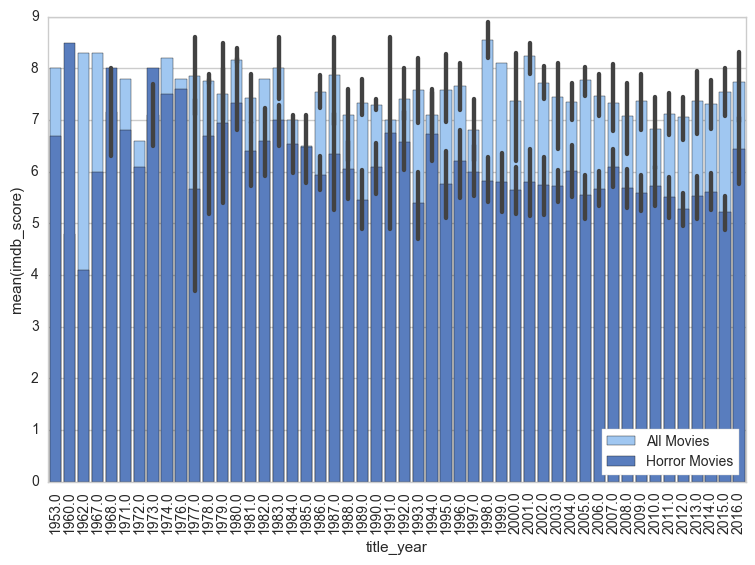

In [11]:
#Gives us all the horror films (or films that contain horror elements)
df_horror = data.loc[data['genres'].str.contains('Horror')]
sns.set(style="whitegrid")


f, ax = plt.subplots(figsize=(9, 6))

sns.set_color_codes("pastel")
sns.barplot(x="title_year", y="imdb_score", data=data,
            label="All Movies", color="b")

sns.set_color_codes("muted")
sns.barplot(x="title_year", y="imdb_score", data=df_horror,
            label="Horror Movies", color="b")

ax.legend(loc="lower right", frameon=True)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [20]:
#Lets compare how many flops horror movies received compared to all movies.
from pychartdir import *
num_flops = data[data['budget'] > data['gross']]
num_horror_flops = df_horror[df_horror['budget'] > df_horror['gross']]

fig, (ax1, ax2) = plt.subplots(1,2)

labels = ['Flops', 'Hit']
colors = ['orange', 'green']
explode = (0.1, 0)  # explode 1st slice
total_flops = [len(num_flops.index), str((len(data.index) - len(num_flops.index)))]
patches, texts, autotext = ax1.pie(total_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
ax1.set_title('Total Box Office Flops')
ax1.legend(patches, labels, loc="best")
ax1.axis('equal')


horror_flops = [len(num_horror_flops.index), str((len(df_horror.index) - len(num_horror_flops.index)))]
patches, texts, autotext = ax2.pie(horror_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
ax2.set_title('Horror Film Box Office Flops')
ax2.legend(patches, labels, loc="best")
ax2.axis('equal')

ImportError: No module named 'pychartdir'

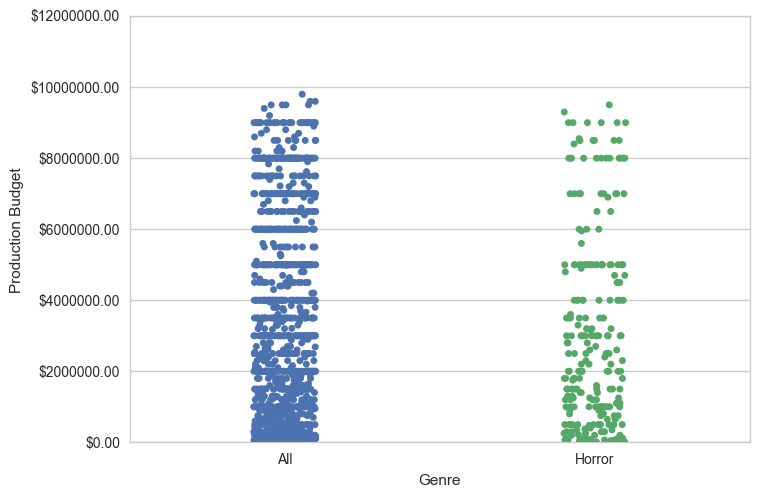

In [6]:
df_budget = data
df_budget['genre_horror'] = np.where(data['genres'].str.contains('Horror'), 'Horror', 'All')
#Removes korean film that has a budget that is not converted to dollars.
df_budget = df_budget[df_budget['budget'] < 10000000]

ax = sns.stripplot(x="genre_horror", y="budget", data=df_budget, jitter=True)
ax.set(xlabel='Genre', ylabel='Production Budget', ylim=(0,None))
ax.yaxis.set_major_formatter(FormatStrFormatter('$' + '%.2f'))